# L'analisi di regressione

In [3]:
source("../_common.R")

suppressPackageStartupMessages({
    library("rio")
    library("car")
    library("lavaan")
    library("semPlot")
    library("repr")
    library("PerformanceAnalytics")
})
set.seed(42)

La padronanza dell'analisi di regressione è fondamentale per comprendere la teoria classica dei test, l’analisi fattoriale e i modelli di equazioni strutturali. Sebbene le tecniche di analisi di regressione si concentrino esclusivamente sulle variabili osservate, i principi della regressione costituiscono la base per tecniche più avanzate che incorporano anche le variabili latenti. Questo capitolo fornisce una sintesi dei concetti fondamentali.

## Covarianza e correlazione

La discussione sull'associazione tra variabili inizia con il concetto di covarianza, che misura quanto due variabili casuali variano insieme. Se le variazioni sono nella stessa direzione, la covarianza è positiva; se variano in direzioni opposte, la covarianza è negativa. Una covarianza di zero indica l'assenza di una relazione lineare tra le variabili.

La covarianza tra due variabili $X$ e $Y$ si calcola con la formula:

$$ \text{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{n-1}, $$

dove $\bar{X}$ e $\bar{Y}$ rappresentano le medie di $X$ e $Y$, e $n$ è il numero totale di osservazioni.

#### Correlazione

A differenza della covarianza, la correlazione fornisce una misura standardizzata che quantifica la relazione lineare tra due variabili in termini di forza e direzione. Importante, la correlazione è indipendente dalle unità di misura delle variabili, rendendola una metrica più universale e facilmente interpretabile.

Il coefficiente di correlazione di Pearson, denotato con $r$, si calcola come:

$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}, $$

dove $\sigma_X$ e $\sigma_Y$ sono le deviazioni standard di $X$ e $Y$, rispettivamente. Il valore di $r$ si muove in un intervallo da -1 a 1, dove un valore vicino a 1 indica una forte correlazione positiva, vicino a -1 indica una forte correlazione negativa, e un valore vicino a 0 suggerisce l'assenza di correlazione lineare significativa tra le variabili.

#### Interpretazione

È cruciale notare che una correlazione elevata tra due variabili non implica automaticamente un rapporto di causa ed effetto tra esse. La correlazione indica semplicemente che esiste una relazione lineare, ma non fornisce informazioni sulla direzione di questa relazione o sulla presenza di eventuali variabili intermedie o confondenti che possono influenzare entrambe le variabili in studio.

Esaminiamo un esempio numerico proposto da Bolin (2022).

In [11]:
d <- rio::import("../data/bolin/chapter2ex.sav")
head(d)

,effort,distraction,performance
,<dbl>,<dbl>,<dbl>
1,14.76928,5.863615,2.560827
2,15.37905,6.473276,3.040385
3,15.03329,4.939044,4.610505
4,14.43418,5.216717,2.315265
5,13.89848,3.496717,1.130678
6,15.46183,4.489045,3.021215


Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"


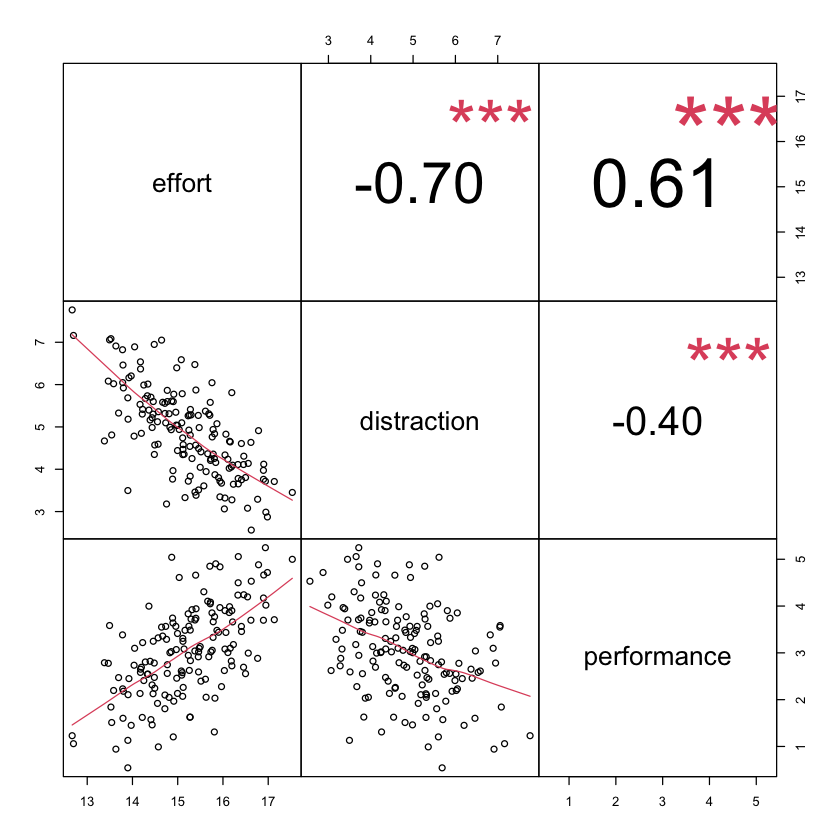

In [5]:
chart.Correlation(d, histogram = FALSE, method = c("pearson"))

## Regressione bivariata

Il modello statistico della regressione bivariata descrive l'associazione tra il valore atteso di $Y \mid x_i$ e $x$ nei termini di una relazione lineare:

$$
\mathbb{E}(Y \mid x_i) = \alpha + \beta x_i,
$$

dove i valori $x_i$ sono considerati fissi per disegno. Nel modello "classico", si assume che le distribuzioni $Y \mid x_i$ siano Normali con deviazione standard $\sigma_\varepsilon$. 

Il significato dei coefficienti di regressione è semplice:

- $\alpha$ è il valore atteso di $Y$ quando $X = 0$;
- $\beta$ è l'incremento atteso nel valore atteso di $Y$ quando $X$ aumenta di un'unità.

Il modello statistico della regressione bivariata è rappresentato nella figura seguente.

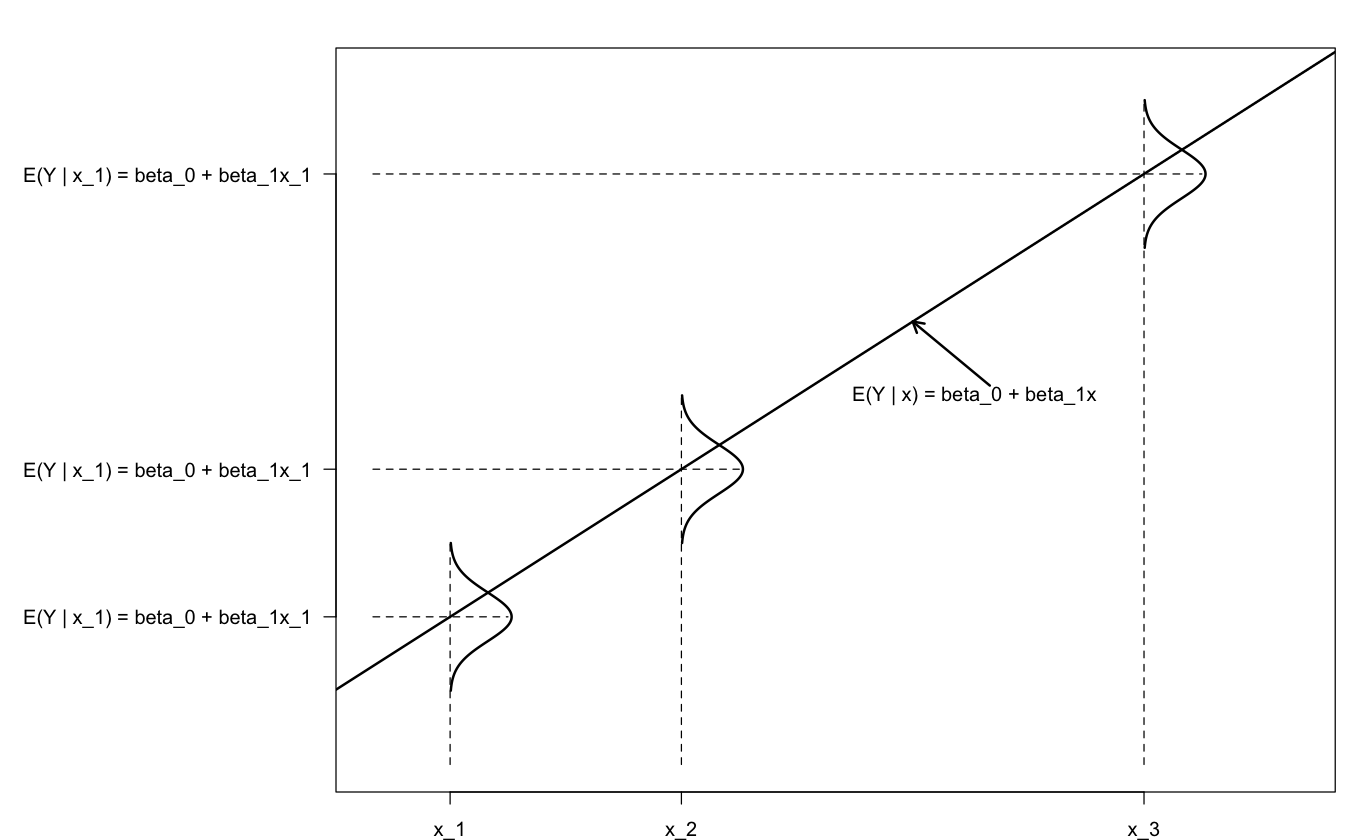

In [4]:
opar <- par(no.readonly = TRUE) # copy of current settings
par(mar = c(2, 14, 2, 1), las = 1)

DF <- data.frame(x = c(1, 4, 9), y = c(1, 4, 9))

plot(y~x, data = DF, xaxt = "n", yaxt = "n", 
     xlim = c(0, 12), ylim = c(-2, 12),
     xlab = "", ylab = "", type = "n")
abline(lm(y~x, data = DF), lwd = 2)
axis(side =1, at =c(1, 4, 10), 
     labels = c("x_1", "x_2", "x_3"))
axis(side =2, at =c(1, 4, 10),
     labels = c("E(Y | x_1) = beta_0 + beta_1x_1",
                "E(Y | x_1) = beta_0 + beta_1x_1",
                "E(Y | x_1) = beta_0 + beta_1x_1") )
segments(1, -2, 1, 2.5, lty = "dashed")
segments(0, 1, 1 + 0.75, 1, lty = "dashed")
segments(4, -2, 4, 5.5, lty = "dashed")
segments(0, 4, 4 + 0.75, 4, lty = "dashed")
segments(10, -2, 10, 11.5, lty = "dashed")
segments(0, 10, 10 + 0.75, 10, lty = "dashed")
ys <- seq(-1.5, 1.5, length = 200)
xs <- dnorm(ys, 0, 0.5)
lines(xs + 1, ys + 1, type = "l",lwd = 2)
lines(xs + 4, ys + 4, type = "l",lwd = 2)
lines(xs + 10, ys + 10, type = "l",lwd = 2)
text(7.8, 5.5, "E(Y | x) = beta_0 + beta_1x")
arrows(8, 5.7, 7, 7, length = 0.1, lwd = 2)
par(opar)

Per fare un esempio pratico, consideriamo i dati dell'antropologo Sahlins, il quale si è chiesto se esiste un'associazione tra l'ampiezza del clan (`consumers`) e l'area occupata da quel clan (`acres`) in una popolazione di cacciatori-raccoglitori. I dati sono i seguenti:

In [5]:
data(Sahlins)
head(Sahlins)

,consumers,acres
,<dbl>,<dbl>
1,1.00,1.71
2,1.08,1.52
3,1.15,1.29
4,1.15,3.09
5,1.20,2.21
6,1.30,2.26


`geom_smooth()` using formula = 'y ~ x'


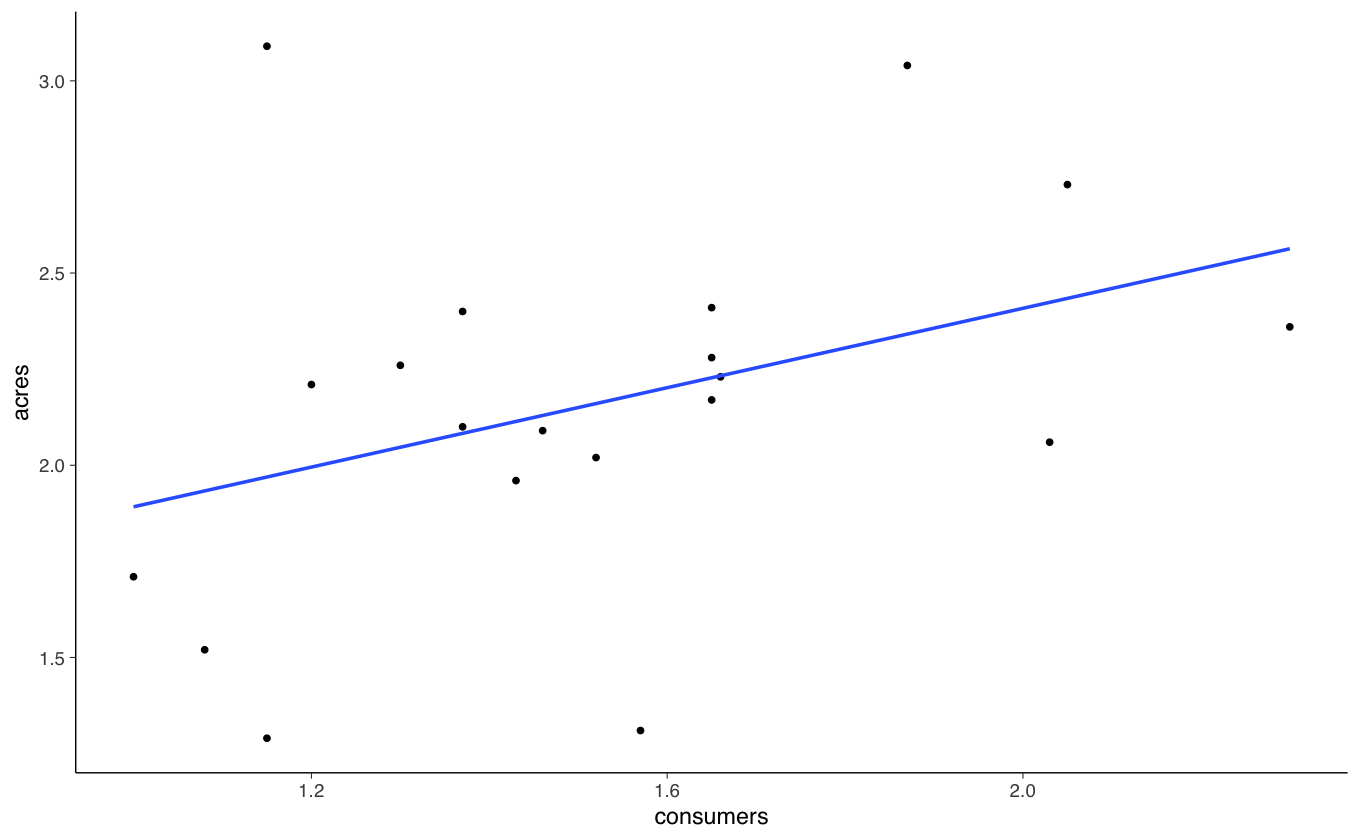

In [6]:
Sahlins |>
  ggplot(aes(x = consumers, y = acres)) +
  geom_point() +
  geom_smooth(method=lm, se=FALSE)

Eseguiamo l'analisi statistica con `lm()`:

In [26]:
fm <- lm(acres ~ consumers, data = Sahlins)
print(fm$coef)

(Intercept)   consumers 
  1.3756445   0.5163201 


Dalla figura notiamo che, se `consumers` aumenta di un'unità (da 1.2 a 2.2), allora la retta di regressione (ovvero, il valore atteso di $Y$) aumenta di circa 0.5 punti -- esattamente, aumenta di 0.5163 punti, come indicato dalla stima del coefficiente $\beta$. L'interpretazione del coefficiente $\alpha$ è più problematica, perché non ha senso pensare ad un clan di ampiezza 0. Per affrontare questo problema, centriamo il predittore.

### Regressori centrati

Esprimiamo la variabile `consumers` nei termini degli scarti dalla media:

In [24]:
Sahlins <- Sahlins |>
  mutate(
    xc = consumers - mean(consumers)
  )

Svolgiamo nuovamente l'analisi di regressione con il nuovo predittore:

In [25]:
fm1 <- lm(acres ~ xc, data = Sahlins)
print(fm1$coef)

(Intercept)          xc 
  2.1620000   0.5163201 


`geom_smooth()` using formula = 'y ~ x'


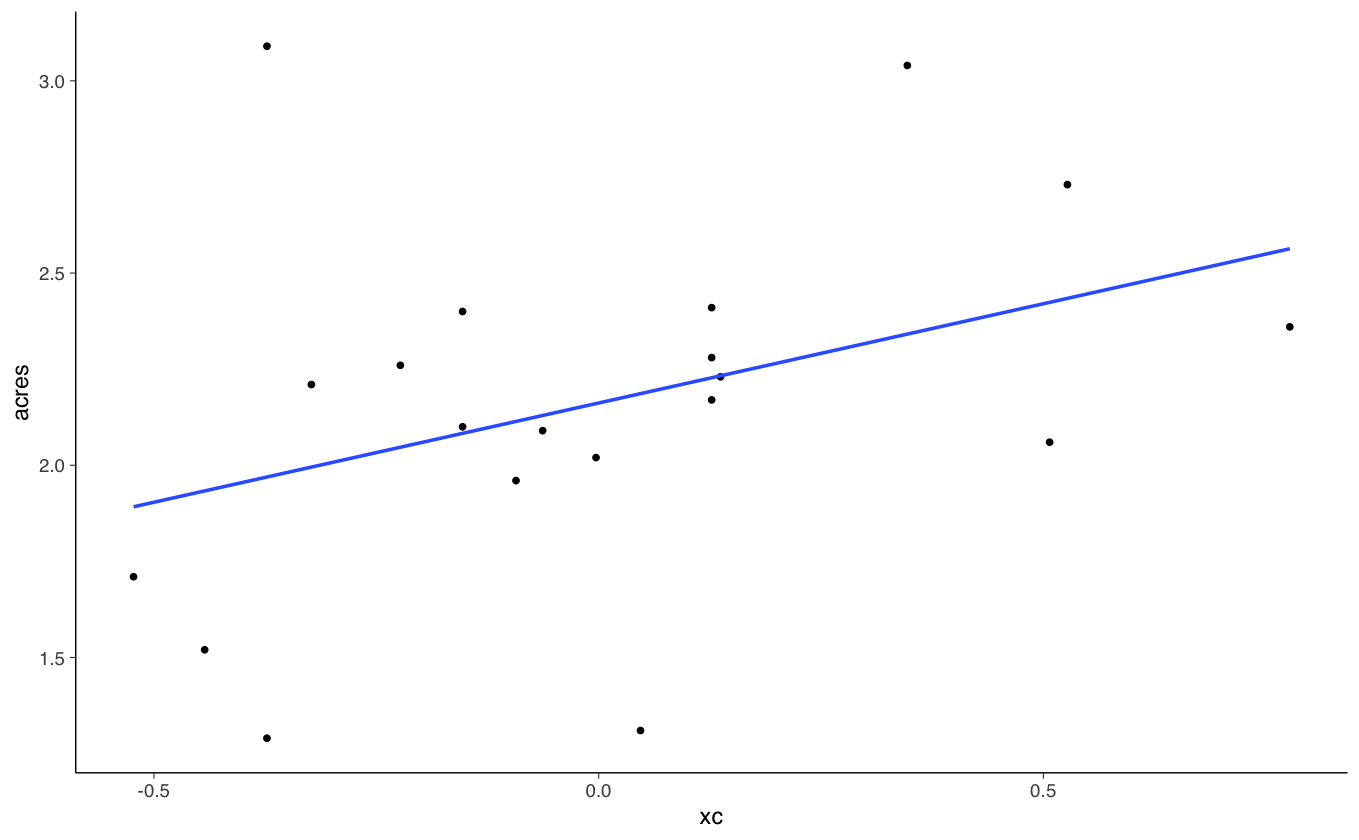

In [9]:
Sahlins %>% 
  ggplot(aes(x = xc, y = acres)) +
  geom_point() +
  geom_smooth(method=lm, se=FALSE)

La stima di $\beta$ è rimasta invariata ma ora possiamo attribuire un significato alla stima di $\alpha$: questo coefficiente indica il valore atteso della $Y$ quando $X$ assume il suo valore medio.

### Minimi quadrati

La stima dei coefficienti del modello di regressione può essere effettuata in modi diversi: massima verosimiglianza o metodi bayesiani. Se ci limitiamo qui alla massima verosimiglianza possiamo semplificare il problema assumento che le distribuzioni condizionate $Y \mid x$ siano Normali. In tali circostanze, la stima dei coefficienti del modello di regressione può essere trovata con il metodo dei minimi quadrati.

In pratica, questo significa trovare i coefficienti $a$ e $b$ che minimizzano 

$$
SS_{\text{res}} = \sum(y_i - \hat{y}_i)^2,
$$

con $\hat{y}_i = a + b x_i$.

Per fornire un'idea di come questo viene fatto, usiamo una simulazione. Per semplicità, supponiamo di conoscere $a = 1.3756445$ e di volere stimare $b$.

In [10]:
x <- Sahlins$consumers
y <- Sahlins$acres
a <- 1.3756445

nrep <- 1e3
b <- seq(0, 1, length.out = nrep)

ssres <- rep(NA, nrep)
for (i in 1:nrep) {
  yhat <- a + b[i] * x
  ssres[i] <- sum((y - yhat)^2)
}

Un grafico di $SS_{\text{res}}$ in funzione di $b$ mostra che il valore $b$ che minimizza $SS_{\text{res}}$ corrisponde, appunto, a 0.5163.

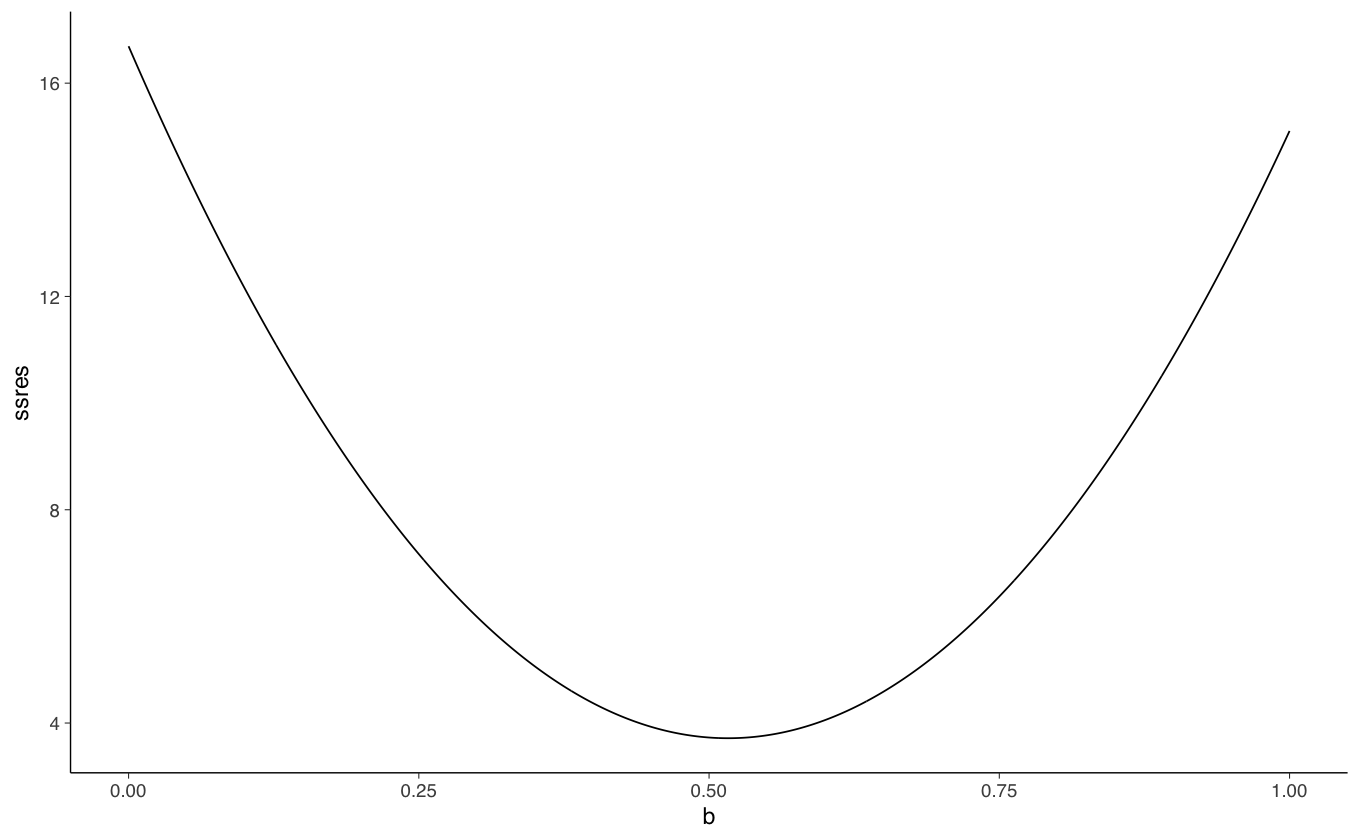

In [11]:
tibble(b, ssres) |>
  ggplot(aes(x = b, y = ssres)) +
  geom_line()

Possiamo trovare il minimo della funzione rappresentata nella figura usando `optim()`:

In [12]:
# Define the function to calculate SSR
ssr_function <- function(b, x, y, a) {
    yhat <- a + b * x
    return(sum((y - yhat)^2))
}

# Use optim to find the value of b that minimizes the SSR
result <- optim(
    par = 0.5, # starting value for b
    fn = ssr_function,
    x = x,
    y = y,
    a = a,
    method = "BFGS"
) # optimization method, BFGS is a good default

# The optimal value of b
optimal_b <- result$par
optimal_b

[1] 0.5163201

In altre parole, il coefficiente dei minimi quadrati $\hat{b}$ indica il valore del parametro $b$ nel modello di regressione lineare che è stato calibrato per minimizzare la somma dei quadrati degli errori.

Una proprietà del modello di regressione lineare è che gli errori hanno media uguale a zero.

In [27]:
sum(fm$residuals)

[1] -3.608225e-16

Una seconda proprietà della soluzione dei minimi quadrati è che la retta di regressione passa per il punto ($\bar{X}$, $\bar{Y}$). 

`geom_smooth()` using formula = 'y ~ x'


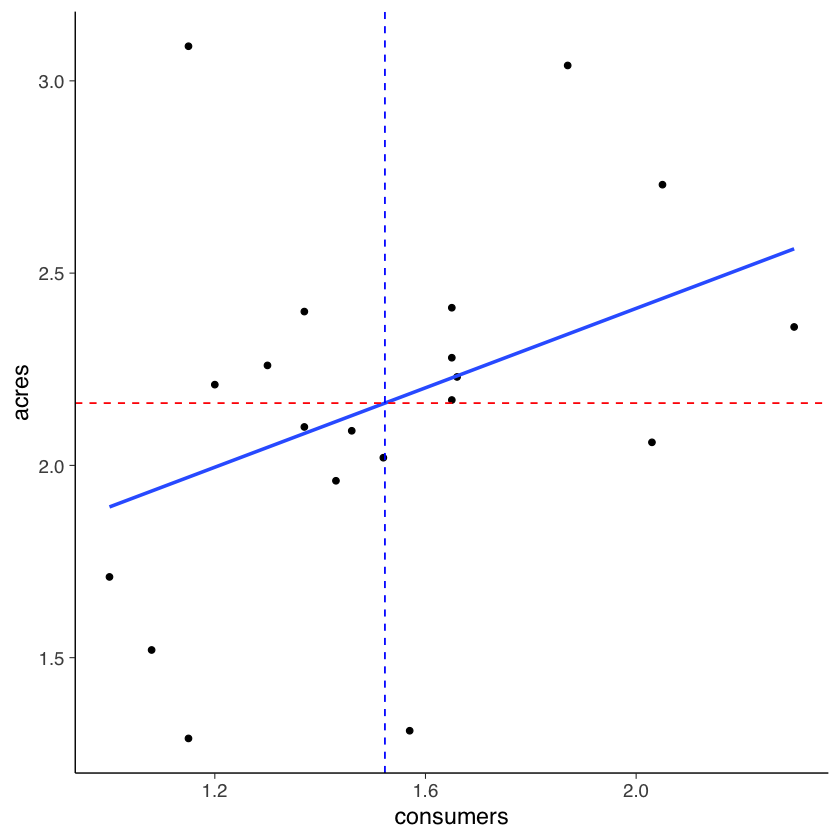

In [30]:
Sahlins %>% 
  ggplot(aes(x = consumers, y = acres)) +
  geom_point() +
  geom_smooth(method=lm, se=FALSE) +
  geom_vline(xintercept = mean(Sahlins$consumers), linetype="dashed", color="blue") +
  geom_hline(yintercept = mean(Sahlins$acres), linetype="dashed", color="red")


### Relazione tra $b$ e $r$

Un altro modo per interpretare $b$ è quello di considerare la relazione tra la pendenza della retta di regressione e il coefficiente di correlazione:

$$
b_X = r_{XY} \frac{S_X}{S_Y}.
$$

L'equazione precedente rende chiaro che, se i dati sono standardizzati, $b = r$. Dunque, possiamo attribuire a $b$ la seguente interpretazione: il coefficiente dei minimi quadrati $\hat{b}$ corrisponde alla correlazione tra $X$ e $Y$, quando i dati sono standardizzati.

Verifichiamo il principio precedente calcolando la correlazione tra `acres` e `consumers`:

In [13]:
Sahlins |>
  dplyr::select(acres, consumers) |>
  cor()

,acres,consumers
acres,1.0000000,0.3756561
consumers,0.3756561,1.0000000


Eseguiamo ora l'analisi di regressione sui dati standardizzati:

In [14]:
fm2 <- lm(scale(acres) ~ scale(consumers), data = Sahlins)
print(fm2$coef)

     (Intercept) scale(consumers) 
    3.015795e-16     3.756561e-01 


Si vede the otteniamo lo stesso risultato.

### Attenuazione

Nel contesto della regressione lineare classica, è abbastanza noto che l'errore nella variabile dipendente $Y$ (cioè, l'errore di misurazione associato alla variabile che si sta cercando di prevedere) può portare a una stima imprecisa dei coefficienti di regressione. Tuttavia, la questione dell'errore nelle variabili indipendenti (X), nota anche come errore di misurazione nella X, è altrettanto importante ma spesso meno intuitiva.

Nel modello di regressione classico, è supposto che le variabili indipendenti $X$ siano misurate senza errore. Questa assunzione è nota come assunzione di non errori nelle variabili esplicative. La realtà, però, è che nelle ricerche empiriche spesso ciò non accade, e le $X$ possono essere misurate con errore. Quando ciò si verifica, le conseguenze sulla stima dei parametri del modello di regressione possono essere sostanziali, portando a quello che è noto come "errore di attenuazione".

### Effetti dell'Errore di Misurazione nella X

1. **Attenuazione dei coefficienti**: L'errore nella variabile indipendente tende a "attenuare" la stima del coefficiente di regressione verso lo zero. Questo significa che la relazione tra $X$ e $Y$ sembrerà meno forte di quanto sia in realtà, a causa della variazione "extra" introdotta dall'errore di misurazione in $X$.

2. **Bias nella stima dei coefficienti**: A differenza dell'errore in $Y$, che influisce principalmente sulla varianza delle stime dei coefficienti ma non sui loro valori attesi (se l'errore è casuale), l'errore in $X$ introduce un bias nei coefficienti. Questo significa che le stime dei coefficienti non saranno solo variabili ma sistematicamente distorte.

3. **Variazione delle stime**: Oltre all'attenuazione, l'errore in $X$ aumenta anche la varianza delle stime dei coefficienti, rendendo meno precisi i risultati della regressione.

In sintesi, l'errore di misurazione nelle variabili indipendenti $X$ può effettivamente portare a un'attenuazione dei coefficienti di regressione, simile all'effetto dell'errore in $Y$, ma con implicazioni che possono essere più profonde a causa del bias introdotto. La consapevolezza di questa problematica e l'adozione di tecniche appropriate per affrontarla sono essenziali per garantire l'affidabilità e la validità delle inferenze tratte dai modelli di regressione.

Esaminiamo la seguente simulazione.

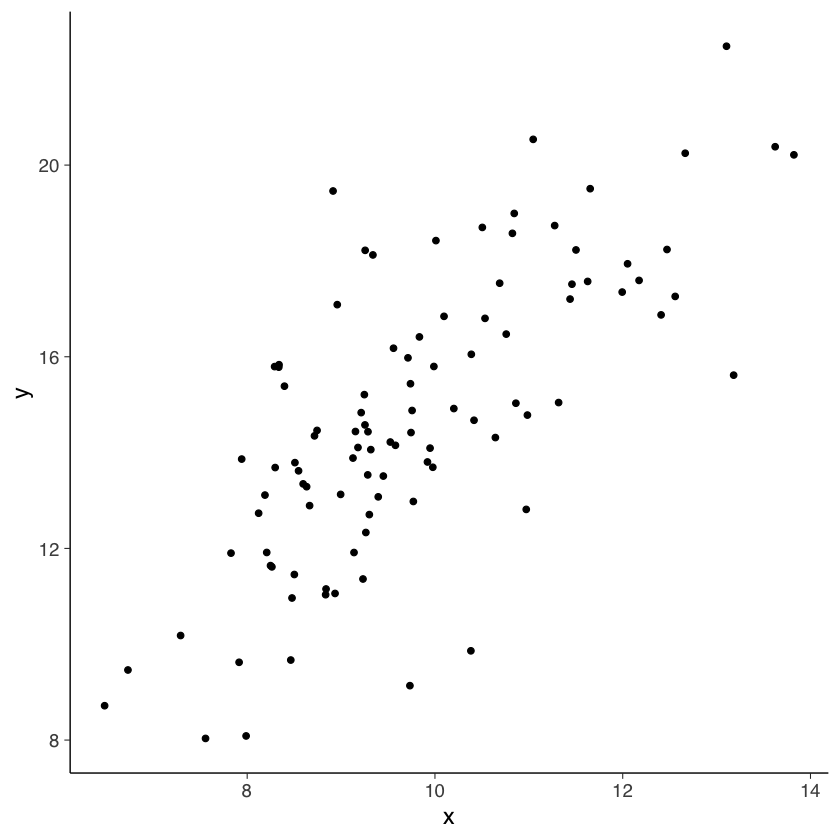

In [31]:
set.seed(1234)
n <- 100
x <- rnorm(n, 10, 1.5)
y <- 1.5 * x + rnorm(n, 0, 2)
tibble(x, y) |>
  ggplot(aes(x, y)) +
  geom_point()

In [9]:
sim_dat <- tibble(x, y)
fm <- lm(y ~ x, sim_dat)
print(fm$coef)

(Intercept)           x 
  0.4221074   1.4652201 


Aggiungendo una componente d'errore su $X$, la grandezza del coefficiente $b$ diminuisce.

In [10]:
sim_dat <- sim_dat |>
  mutate(
    x1 = x + rnorm(n, 0, 2)
  )

fm1 <- lm(y ~ x1, sim_dat)
print(fm1$coef)

(Intercept)          x1 
  8.3872176   0.6295924 


### Valori predetti e residui

Il modello lineare di regressione è caratterizzato dalla scomposizione dei punteggi oservati $Y$ in una componente deterministica, predetta dal modello, ovvero $\hat{y}_i = a + b x_i$ e una componente casuale di errore: $e_i = y_i - \hat{y}_i$.

Nel caso dei dati di Sahlins, i valori predetti sono i seguenti:

In [18]:
fm <- lm(acres ~ consumers, data = Sahlins)
a <- fm$coef[1]
b <- fm$coef[2]
yhat <- a + b * Sahlins$consumers


I residui sono i seguenti:

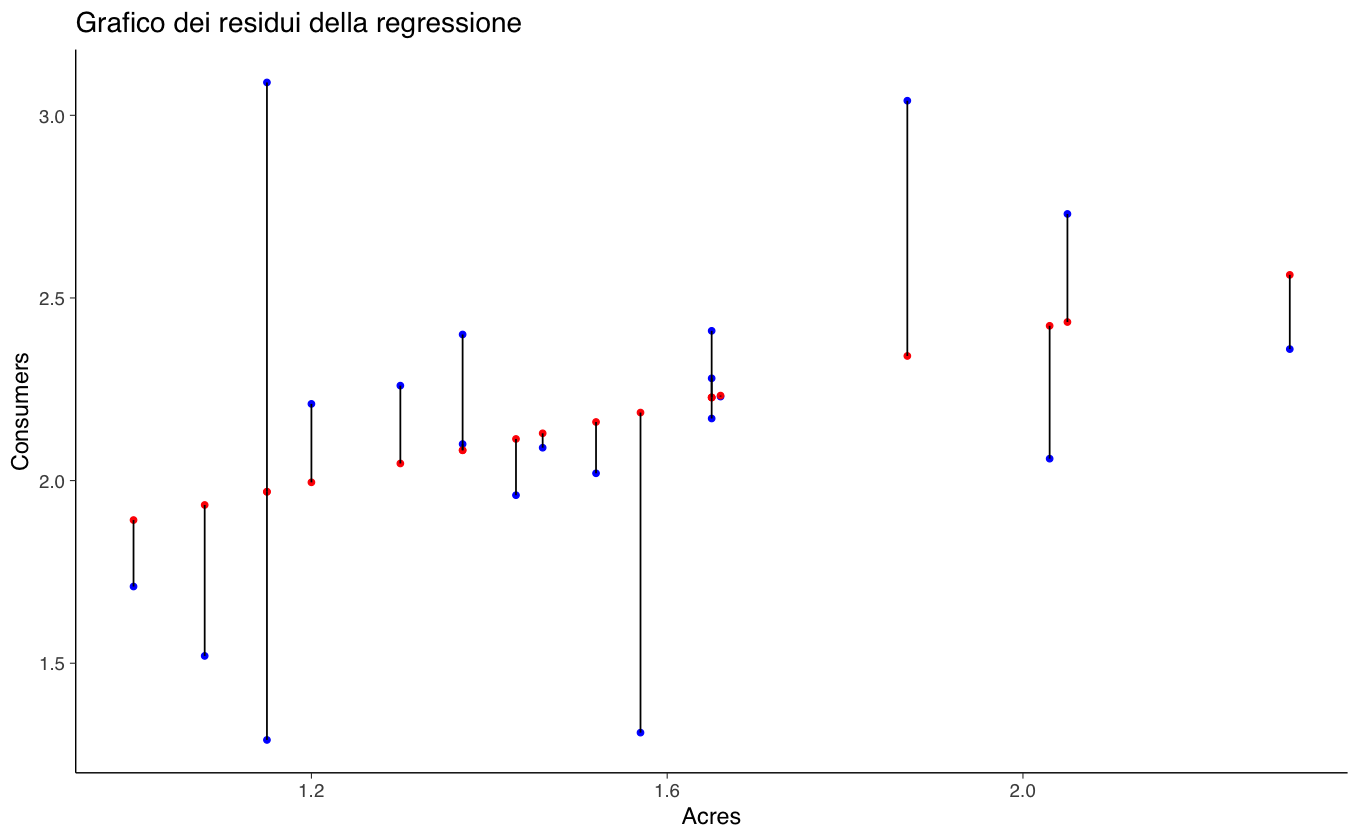

In [19]:
e <- Sahlins$consumers - yhat

ggplot(data = Sahlins, aes(x = consumers)) +
    geom_point(aes(y = acres), color = "blue") + # Punti osservati
    geom_point(aes(y = yhat), color = "red") + # Punti predetti
    geom_segment(aes(xend = consumers, y = yhat, yend = acres), 
               color = "black") +  # Segmenti dei residui
    labs(x = "Acres", y = "Consumers") +
    ggtitle("Grafico dei residui della regressione")


### Coefficiente di determinazione

Il coefficiente di determinazione misura il quadrato della correlazione tra i valori osservati e i valori predetti: $r_{y, \hat{y}}^2$:

In [20]:
cor(Sahlins$acres, yhat)^2

[1] 0.1411175

ovvero, il rapporto tra la devianza attribuibile alla retta di regressione,  $\sum_i(\hat{u}_i - \bar{y})^2$, e la devianza totale, $\sum_i (y_i - \bar{y})^2$:

In [21]:
# devianza della regressione
ssr <- sum((yhat - mean(Sahlins$acres))^2)
# devianza totale
sst <- sum((Sahlins$acres - mean(Sahlins$acres))^2)
# coefficiente di determinazione
ssr / sst

[1] 0.1411175

In [22]:
summary(fm) |> print()


Call:
lm(formula = acres ~ consumers, data = Sahlins)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8763 -0.1873 -0.0211  0.2135  1.1206 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   1.3756     0.4684   2.937  0.00881 **
consumers     0.5163     0.3002   1.720  0.10263   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4543 on 18 degrees of freedom
Multiple R-squared:  0.1411,	Adjusted R-squared:  0.0934 
F-statistic: 2.957 on 1 and 18 DF,  p-value: 0.1026



### Errore standard della regressione

L'errore standard della regressione è una stima della dispersione di $y \mid x_i$ nella popolazione.  Non è altro che la deviazione standard dei residui

$$
e = y_i - \hat{y}_i
$$

che, al denominatore, riporta $n-2$. La ragione è che, per calcolare $\hat{y}$, vengono "perduti" due gradi di libertà -- il calcolo di $\hat{y}$ è basato sulla stima di due coefficienti: $a$ e $b$.

In [23]:
e <- Sahlins$acres - yhat
(sum(e^2) / (length(Sahlins$acres) - 2)) |>
  sqrt()

[1] 0.4543179

Il valore trovato corrisponde a quello riportato nell'output di `lm()`. 

### Coefficienti dei minimi quadrati con l'algebra lineare

Per derivare i coefficienti di una regressione lineare mediante l'approccio dei minimi quadrati usando l'algebra lineare, possiamo utilizzare la formula ben nota:

$$
\hat{\beta} = (X^TX)^{-1}X^Ty,
$$

dove:
- $\hat{\beta}$ è il vettore dei coefficienti stimati della regressione (incluso l'intercetta se $X$ include una colonna di uni),
- $X$ è la matrice di design che include i valori delle variabili indipendenti, con una colonna aggiuntiva di uni se si include l'intercetta nella regressione,
- $y$ è il vettore delle osservazioni della variabile dipendente.

Facciamo un esempio in R, utilizzando il set di dati di Sahlins.

In [33]:
x <- Sahlins$consumers
y <- Sahlins$acres

# Costruzione della matrice di design X
X <- cbind(1, x) # Aggiungiamo una colonna di uni per l'intercetta

# Applicazione della formula dei minimi quadrati
beta_hat <- solve(t(X) %*% X) %*% t(X) %*% y

# Stampa dei coefficienti stimati
print(beta_hat)

       [,1]
  1.3756445
x 0.5163201


In questo esempio:
- Costruiamo la matrice di design $X$, includendo una colonna di uni per permettere la stima dell'intercetta.
- Applichiamo la formula dei minimi quadrati per calcolare $\hat{\beta}$, che ci dà i coefficienti stimati per l'intercetta e la pendenza.

Questo metodo ci permette di ottenere una stima dei coefficienti della regressione lineare che minimizza la somma dei quadrati degli errori tra i valori osservati di $y$ e quelli predetti dal modello.

## Regressione multipla

Nella regressione multipla vengono utilizzati $k > 1$ predittori:

$$
y_i = \alpha + \sum_{j=1}^k \beta_j x_i + \varepsilon_i.
$$

L'interpretazione geometrica è simile a quella del modello bivariato. Nel caso di due predittori, il valore atteso della $y$ può essere rappresentato da un piano; nel caso di $k > 2$ predittori, da un iper-piano. Nel caso di $k=2$, tale piano è posto in uno spazio di dimensioni $x_1$, $x_2$ (che possiamo immaginare definire un piano orizzontale) e $y$ (ortogonale a tale piano). La superficie piana che rappresenta $\mathbb{E}(y)$ è inclinata in maniera tale che l'angolo tra il piano e l'asse $x_1$ corrisponde a $\beta_1$ e l'angolo tra il piano e l'asse $x_2$ corrisponde a $\beta_2$.

### Significato dei coefficienti parziali di regressione

Ai coefficienti parziali del modello di regressione multipla possiamo assegnare la seguente interpretazione:

_Il coefficiente parziale di regressione $\beta_j$ rappresenta l'incremento atteso della $y$ se $x_j$ viene incrementata di un'unità, tenendo costante il valore delle altre variabili indipendenti._

Un modo per interpretare la locuzione "al netto dell'effetto delle altre variabili indipendenti" è quello di esaminare la relazione tra la $y$ parzializzata e la $x_j$ parzializzata. In questo contesto, parzializzare significa decomporre una variabile di due componenti: una componente che è linearmente predicibile da una o più altre variabili e una componente che è linearmente incorrelata con tali varibili "terze".

Se eseguiamo questa "depurazione" dell'effetto delle variabili "terze" sia sulla $y$ sia su $x_j$, possiamo poi esaminare la relazione bivariata che intercorre tra la componente della $y$ linearmente indipendente dalle variabili "terze" e la componente della $x_j$ linearmente indipendente dalle variabili "terze". Il coefficiente di regressione bivariato così ottenuto sarà identico al coefficiente parziale di regressione nel modello di regressione multipla. Questa procedura ci consente di assegnare un'interpretazione "intuitiva" al coefficiente parziale di regressione $\beta_j$.

Esaminiamo un caso concreto.

In [15]:
d <- rio::import("../data/kidiq.dta")
glimpse(d)

Rows: 434
Columns: 5
$ kid_score <dbl> 65, 98, 85, 83, 115, 98, 69, 106, 102, 95, 91, 58, 84, 78, 1~
$ mom_hs    <dbl> 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, ~
$ mom_iq    <dbl> 121.11753, 89.36188, 115.44316, 99.44964, 92.74571, 107.9018~
$ mom_work  <dbl> 4, 4, 4, 3, 4, 1, 4, 3, 1, 1, 1, 4, 4, 4, 2, 1, 3, 3, 4, 3, ~
$ mom_age   <dbl> 27, 25, 27, 25, 27, 18, 20, 23, 24, 19, 23, 24, 27, 26, 24, ~


In [16]:
fm <- lm(
  kid_score ~ mom_iq + mom_work + mom_age + mom_hs, data = d
)
print(fm$coef)

(Intercept)      mom_iq    mom_work     mom_age      mom_hs 
 20.8226117   0.5620814   0.1337287   0.2198599   5.5611781 


Eseguiamo la parzializzazione della $y$ in funzione delle variabili `mom_work`, `mom_age` e `mom_hs`:

In [17]:
fm_y <- lm(kid_score ~ mom_work + mom_age + mom_hs, data = d)

Lo stesso per `mom_iq`:

In [18]:
fm_x <- lm(mom_iq ~ mom_work + mom_age + mom_hs, data = d)

Esaminiamo ora la regressione bivariata tra le componenti parzializzate della $y$ e di $x_j$:

In [19]:
mod <- lm(fm_y$residuals ~ fm_x$residuals)
print(mod$coef)

   (Intercept) fm_x$residuals 
 -9.328143e-16   5.620814e-01 


Si vede come il coefficiente di regressione bivariato risulta identico al corrispondente coefficiente parziale di regressione.

Si può quindi affermare che il coefficiente di regressione parziale $b_j$ è equivalente al coefficiente di regressione ottenuto in un modello bivariato che prende in considerazione esclusivamente le componenti residuali di $y$ e $x_j$, una volta rimosse le influenze delle altre variabili indipendenti. Questo significa che $b_j$ riflette la relazione diretta tra $y$ e $x_j$, depurata dall'effetto di tutte le altre variabili incluse nel modello.

### Relazioni causali

Un altro modo per comprendere i coefficienti di regressione parziale è attraverso l'uso dei diagrammi di percorso, un concetto che verrà esplorato più dettagliatamente più avanti e che qui introduciamo brevemente. Questi diagrammi visualizzano le relazioni presumibilmente causali tra variabili, delineando le cause esogene all'inizio del percorso e le conseguenze o variabili endogene alla fine. Nel diagramma, le variabili causali sono collegate alle loro conseguenze attraverso frecce che rappresentano l'effetto diretto di una variabile sull'altra. Queste frecce simboleggiano i coefficienti di percorso, che corrispondono esattamente ai coefficienti di regressione parziale in un modello di regressione multipla. In questa rappresentazione, i coefficienti di percorso illustrano l'effetto diretto che si prevede su una variabile endogena a seguito dell'aumento di una unità nella variabile esogena, mantenendo inalterate tutte le altre relazioni strutturali all'interno del modello.

Per illustrare questo concetto, usiamo la funzione `sem()` del pacchetto `lavaan` per definire il modello rappresentato nel successivo diagramma di percorso:

In [20]:
model <- "
  kid_score ~ mom_hs + mom_iq + mom_work + mom_age
"

Adattiamo il modello ai dati

In [21]:
fit <- sem(model, data = d)

Il diagramma di percorso si ottiene con le seguenti istruzioni:

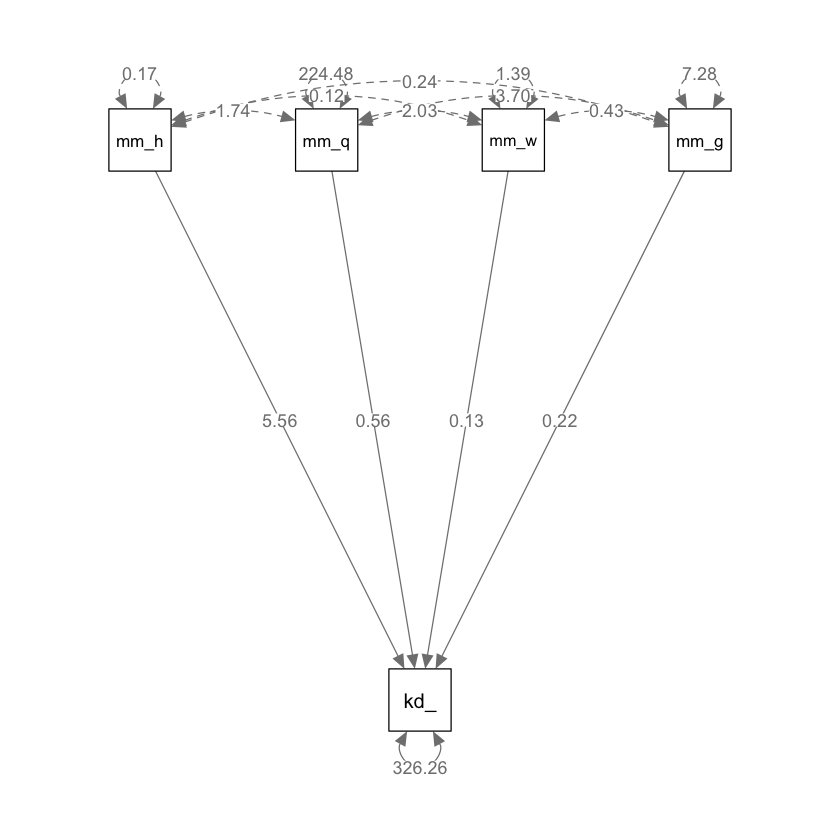

In [22]:
semPaths(
  fit, "est",
  posCol = c("black"),
  edge.label.cex = 0.9,
  sizeMan = 7, 
  what = "path"
)

Come indicato nel diagramma, l'effetto diretto di `mom_iq` su `kid_score` è identico al corrispondente coefficiente parziale di regressione.  

## Proprietà degli stimatori dei minimi quadrati

Consideriamo ora il problema dell'inferenza statistica frequentista nel caso più semplice, quello della regressione bivariata. Il caso generale della regressione multipla segue lo stesso approccio, anche se le formule sono più complesse in quanto vengono formulate nei termini dell'albebra matriciale.

Per il caso bivariato, si può dire che il coefficiente dei minimi quadrati $b$ è una combinazione lineare delle osservazioni $y_i$. Tale proprietà è importante perché consente di derivare la distribuzione di $b$ dalla distribuzione delle $y_i$. 
Può essere dimostrato che la formula per il calcolo di $b$ si può scrivere nel modo seguente:

$$
\begin{align}
b &= \sum_i \left[\frac{x_i-\bar{x}}{\sum_j(x_j-\bar{x})^2}\right]y_i = \textstyle\sum m_i y_i,
\end{align}
$$

dove $m_i \triangleq (x_i-\bar{x}) / \sum (x_j-\bar{x})^2$ è il peso associato a ciascun valore $y_i$. Dato che i valori $x_i$ sono fissi e $m_i$ dipende solo da $x_i$, anche i pesi $m_i$ sono fissi.  

Il valore atteso di $b$ è uguale a 

$$
\begin{align}
E(b) &= \textstyle\sum m_i E(y_i)\notag\\ 
&= \textstyle\sum m_i (\alpha + \beta x_i)\notag\\ 
&= \textstyle\alpha\sum m_i + \beta \sum m_i x_i\notag\\
&= \frac{\alpha \sum(x_i-\bar{x})}{\sum(x_i-\bar{x})^2} + \beta \frac{\sum(x_i-\bar{x})x_i}{\sum(x_i-\bar{x})^2}\notag\\
&= 0 + \beta \frac{\sum x_i^2 -\bar{x}\sum x_i}{\sum(x_i-\bar{x})^2}\notag\\ 
&= \beta \frac{\sum x_i^2 - n\bar{x}^2}{\sum(x_i-\bar{x})^2}\notag\\ 
&= \beta.
\end{align}
$$

Questo dimostra che il valore atteso del coefficiente stimato $b$ in una regressione lineare semplice è uguale al vero valore del parametro $\beta$, dimostrando così che la stima del coefficiente è non distorta (o "unbiased"). Andiamo a vedere in dettaglio il passaggio dalla penultima all'ultima riga. Dalla penultima riga, abbiamo:

$$E(b) = \beta \frac{\sum x_i^2 - n\bar{x}^2}{\sum(x_i-\bar{x})^2}.$$

L'ultimo passaggio si basa sulla manipolazione algebrica e sull'identità che definisce la varianza. La varianza di $x$, denotata come $Var(x)$, è data da:

$$Var(x) = \frac{1}{n}\sum (x_i - \bar{x})^2 = \frac{\sum x_i^2}{n} - \bar{x}^2.$$

Moltiplicando entrambi i lati per $n$, otteniamo:

$$nVar(x) = \sum x_i^2 - n\bar{x}^2.$$

Riconosciamo ora che il numeratore dell'espressione di $E(b)$ corrisponde a $nVar(x)$, e il denominatore è proprio la definizione della somma dei quadrati delle deviazioni ($\sum (x_i - \bar{x})^2$, che è $n$ volte la varianza di $x$):

$$E(b) = \beta \frac{nVar(x)}{nVar(x)} = \beta.$$

Quindi, questa manipolazione dimostra che il valore atteso del coefficiente di regressione stimato $b$ è effettivamente il vero valore $\beta$, mostrando che la stima del coefficiente di regressione in una regressione lineare semplice è non distorta rispetto al vero valore del parametro.

In maniera equivalente si può dimostrare che $E(a) = \alpha$.

Sotto le ipotesi di omoschedasticità $\big[ Var(y_i) = Var(\varepsilon_i)=\sigma^2_{\varepsilon}\big]$ e indipendenza, la varianza di $b$ è 

$$
\begin{align}
Var(b) &= \textstyle Var\big(\sum m_i y_i\big)\notag\\
&= \textstyle\mathop{\sum m_i^2} Var(y_i)\notag\\ 
&= \textstyle\mathop{\sum m_i^2} \sigma^2_{\varepsilon}\notag\\
&= \frac{\mathop{\sigma^2_{\varepsilon}} \textstyle\sum(x_i-\bar{x})^2}{\big[\textstyle\sum(x_i-\bar{x})^2\big]^2}\notag\\
&= \frac{\sigma^2_{\varepsilon}}{\sum(x_i-\bar{x})^2}.
\end{align}
$$

In maniera simile si dimostra che la varianza di $a$ è 

$$
Var(a)= \frac{\sigma^2_{\varepsilon} \textstyle\sum x_i^2}{n \textstyle\sum (x_i-\bar{x})^2}.
$$

Dato che sia $a$ che $b$ sono funzioni lineari di $y_i$, se i valori $y_i$ seguono la distribuzione gaussiana, allora anche  $a$ e $b$ saranno distribuiti secondo una distribuzione normale. In conclusione,

$$
\begin{align}
b &\sim \mathcal{N}\bigg(\beta,  \frac{\sigma^2_{\varepsilon}}{\sum(x_i-\bar{x})^2}\bigg),\\
a &\sim \mathcal{N}\bigg(\alpha, \frac{\sigma^2_{\varepsilon}\textstyle\sum x_i^2}{n \textstyle\sum (x_i-\bar{x})^2} \bigg).
\end{align}
$$

### Ipotesi statistiche e statistica test

Una volta definite le proprietà delle distribuzioni degli stimatori dei minimi quadrati è possibile procedere con l'inferenza sui parametri del modello di regressione.
L'inferenza statistica si articola nella formulazione degli intervalli di confidenza per i parametri di interesse e nei test di significatività statistica.

Un'ipotesi che viene frequentemente sottoposta a verifica è quella di significatività, cioè l'ipotesi che alla variabile esplicativa sia associato un coefficiente nullo.
In tal caso, l'ipotesi nulla è

$$H_0:\beta=0$$
e l'ipotesi alternativa è

  $$H_1:\beta \neq 0.$$
  
Sotto l'ipotesi nulla $H_0: \beta = 0$ la statistica

$$
 t_{\hat{\beta}} = \frac{\hat{\beta}}{s_{\hat{\beta}}}
$$

si distribuisce come una variabile aleatoria $t$ di Student con $n-2$ gradi di libert{\`a}.

Di fronte al problema di decidere se il valore stimato $\hat{\beta}$ sia sufficientemente "distante" da zero, in modo da respingere l'ipotesi nulla che il vero valore $\beta$ sia nullo, non è sufficiente basarsi soltanto sul valore numerico assunto da $\hat{\beta}$, ma occorre tener conto della variabilità campionaria.
La statistica ottenuta dividendo $\hat{\beta}$ per la stima del suo errore standard, $s_{\hat{\beta}}$, ci permette di utilizzare la distribuzione $t$ di  Student come metrica per stabilire se la stima trovata si debba considerare "diversa" da quanto ipotizzato sotto $H_0$.

L'ipotesi nulla viene rifiutata quando il valore assoluto del rapporto è esterno alla regione di accettazione, i cui limiti sono definiti dai valori critici della distribuzione $t$ di Student con $n - 2$ gradi di libertà per il livello di significatività $\alpha$ prescelto.
Se l'ipotesi nulla viene rifiutata si dice che il coefficiente $\hat{\beta}$ è "statisticamente significativo" ammettendo così la possibilità di descrivere con un modello lineare la relazione esistente tra le  variabili $X$ e $Y$.

Quando non si può rifiutare l'ipotesi nulla nel modello di regressione, si conclude che il coefficiente angolare della retta non risulta significativamente diverso da zero, individuando  così nella popolazione una retta parallela all'asse delle 

### Riportare i risultati

È consuetudine riportare i risultati dell'analisi di regressione in modo che insieme alle stime dei coefficienti vengano riportati i rispettivi errori standard stimati. Il valore-$p$ esprime la probabilità di ottenere un valore del test uguale o superiore a quello ottenuto nel campione esaminato, utilizzando la distribuzione campionaria del test sotto l'ipotesi nulla. 
Se $t_{\hat{\beta}}$ è il valore osservato del rapporto $t$ per il coefficiente angolare della retta di regressione, allora il { $p$-valore} è dato da

$$
p = 2 \times Pr(t \geq |t_{\hat{\beta}}|),
$$

dove $t$ è il valore di una variabile aleatoria $t$ di Student con $(n-2)$ gradi di libertà.

#### Regola di decisione

Ogni volta che il $p$-valore del test è inferiore al livello di significatività che si è scelto per $H_0$, il test porta al rifiuto dell'ipotesi nulla. Solitamente si sceglie un livello $\alpha$ pari a 0.05 o 0.01.

I test di significatività possono essere eseguiti con R, utilizzando la funzione $\texttt{summary()}$ applicata all'oggetto creato da $\texttt{lm()}$.

Il test statistico sul parametro $\beta$ del modello di regressione verifica l'ipotesi nulla di indipendenza, ovvero l'ipotesi che, nella popolazione, la pendenza della retta di regressione sia uguale a zero. Più informativo del test statistico $H_0: \beta=0$ è  l'intervallo di confidenza per il parametro $\beta$:

$$
\hat{\beta} \pm t_{\alpha/2} s_{\hat{\beta}}.
$$

## Considerazioni conclusive

Il modello di regressione lineare semplice è un metodo per studiare la relazione tra due variabili e per prevedere il valore della variabile dipendente in base alla variabile indipendente. Tuttavia, questo modello è limitato poiché si concentra solo sulla relazione tra una singola variabile indipendente e la variabile dipendente. Quando ci sono più variabili indipendenti, il modello di regressione diventa più complesso e richiede l'uso dell'algebra matriciale. Questo modello può includere variabili indipendenti sia quantitative che qualitative e può essere utilizzato anche per l'analisi della varianza. Il modello lineare è alla base dell'analisi fattoriale, una tecnica ampiamente utilizzata per la costruzione e la validazione dei test psicometrici.

## Session Info

In [32]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.4

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] PerformanceAnalytics_2.0.4 xts_0.13.2                
 [3] zoo_1.8-12                 repr_1.1.6                
 [5] car_3.1-2                  carData_3.0-5             
 [7] rio_1.0.1                  ggokabeito_0.1.0          
 [9] viridis_0.6.5              viridisLite_0.4.2         
[11] ggpubr_0.6.0               ggExtra_0.10.1            
[13] bayesplot_1.11.1           gridExtra_2.3             
[15] patchwork_1.2.0            semTools_0.5-6            
[17] 